## Justyna Cierniak, gr. II, Katowice


## Projekt zaliczeniowy
Bootcamp Data Science ING

## Temat 1: Przywidywanie cen mieszkań na podstawie danych z serwisu Otodom
Celem projektu jest zastosowanie modeli regresji do przewidzenia ceny mieszkania o podanych cechach.
## cz. II

##  

## Modelowanie

Wczytuję bazę, przygotowaną w pliku "1_pobieranie i czyszczenie danych" jako "JC_df_clean".

In [1]:
import pandas as pd

In [2]:
df_mod=pd.read_csv('JC_df_clean')

In [3]:
df_mod.head()

,Unnamed: 0,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy,rynek_pierwotny,rodzaj_zabudowy_apartamentowiec,rodzaj_zabudowy_blok,rodzaj_zabudowy_dom,rodzaj_zabudowy_kamienica,stan_wykonczenia_do_remontu,stan_wykonczenia_do_wykonczenia,stan_wykonczenia_do_zamieszkania
0,0,299000.0,8.0,2.0,2.0,40.00,2019.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,275709.0,10.0,3.0,1.0,48.37,2000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,518891.0,10.0,4.0,2.0,79.22,2000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,255000.0,4.0,3.0,10.0,50.00,2019.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,290457.0,10.0,3.0,1.0,49.23,2000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 15 columns):
Unnamed: 0                          2166 non-null int64
cena                                2166 non-null float64
liczba_pieter                       2166 non-null float64
liczba_pokoi                        2166 non-null float64
pietro                              2166 non-null float64
powierzchnia                        2166 non-null float64
rok_budowy                          2166 non-null float64
rynek_pierwotny                     2166 non-null float64
rodzaj_zabudowy_apartamentowiec     2166 non-null float64
rodzaj_zabudowy_blok                2166 non-null float64
rodzaj_zabudowy_dom                 2166 non-null float64
rodzaj_zabudowy_kamienica           2166 non-null float64
stan_wykonczenia_do_remontu         2166 non-null float64
stan_wykonczenia_do_wykonczenia     2166 non-null float64
stan_wykonczenia_do_zamieszkania    2166 non-null float64
dtypes: float64(14), int6

Usuwam kolumnę "Unnamed" - gdyż jest to index

In [5]:
df_mod=df_mod.drop('Unnamed: 0',axis=1)

Analizuję korelację pomiędz ceną a poszczególnymi zmiennymi

In [6]:
correl = df_mod.corr()
correl.sort_values(['cena'], ascending=False, inplace=True)
correl.cena

cena                                1.000000
powierzchnia                        0.789965
liczba_pokoi                        0.654301
rodzaj_zabudowy_kamienica           0.122751
rodzaj_zabudowy_apartamentowiec     0.114070
stan_wykonczenia_do_zamieszkania    0.072659
stan_wykonczenia_do_remontu         0.058297
rodzaj_zabudowy_dom                 0.051377
pietro                             -0.005184
stan_wykonczenia_do_wykonczenia    -0.050419
rynek_pierwotny                    -0.079323
rok_budowy                         -0.103807
liczba_pieter                      -0.129923
rodzaj_zabudowy_blok               -0.196123
Name: cena, dtype: float64

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

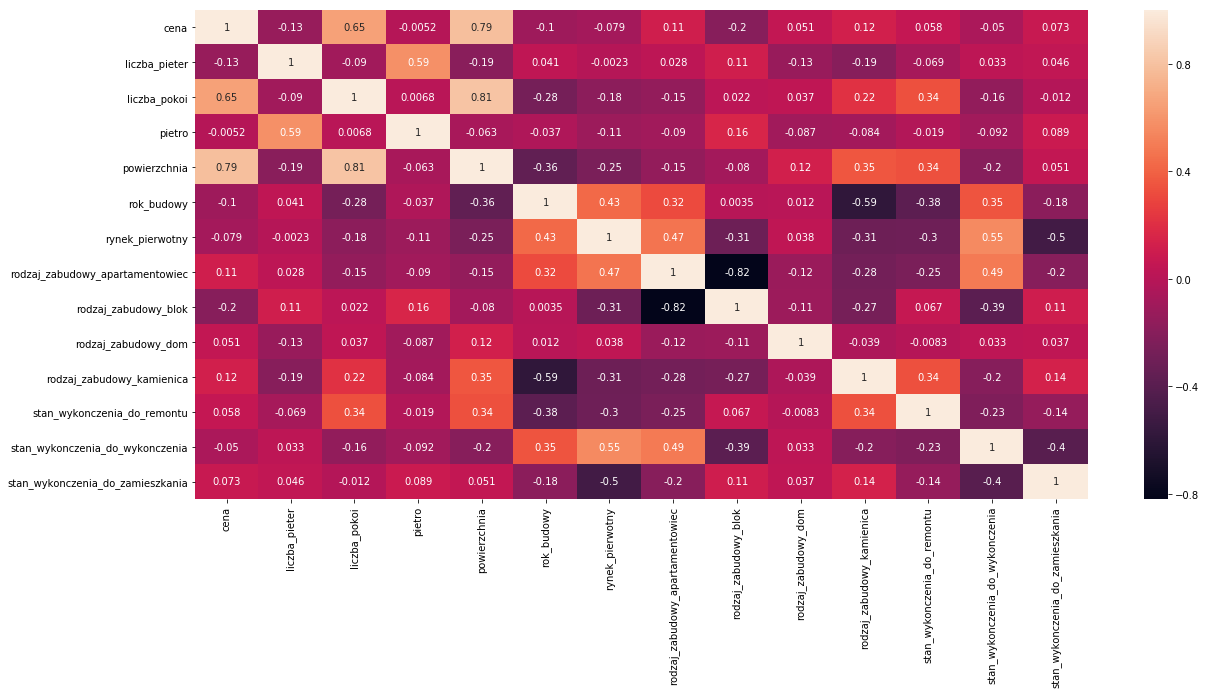

In [8]:
correl = df_mod.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(correl, annot=True)

Z powyższego wynika, że:

- z ceną najbardziej skorekowane są "powierzchnia" i "liczba_pokoi", co jest zgodne z intuicją. 


- najmniej skorelowane z ceną jest "pietro" --> usuwam tą kolumnę. Jeśli bym ją pozostawiła- wyniki większości modeli na zbiorze testowym są gorsze.

In [9]:
df_mod=df_mod.drop('pietro',axis=1)

Oddzielam kolumnę "cena" jako wartość którą będę przewidywać i usuwam ją z X-ów (obserwacji)

In [10]:
y_df = df_mod.cena
X_df = df_mod.drop(['cena'], axis=1)

In [11]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 12 columns):
liczba_pieter                       2166 non-null float64
liczba_pokoi                        2166 non-null float64
powierzchnia                        2166 non-null float64
rok_budowy                          2166 non-null float64
rynek_pierwotny                     2166 non-null float64
rodzaj_zabudowy_apartamentowiec     2166 non-null float64
rodzaj_zabudowy_blok                2166 non-null float64
rodzaj_zabudowy_dom                 2166 non-null float64
rodzaj_zabudowy_kamienica           2166 non-null float64
stan_wykonczenia_do_remontu         2166 non-null float64
stan_wykonczenia_do_wykonczenia     2166 non-null float64
stan_wykonczenia_do_zamieszkania    2166 non-null float64
dtypes: float64(12)
memory usage: 203.1 KB


In [12]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold 
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn import  metrics

Dzielę dane na zbiót treningowy i testowy

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3, random_state=42)

Skaluję dane

In [14]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Redukuję liczę wymiarów.

In [15]:
pca = PCA(n_components = 10)

pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

Po kolei testuję 5 modeli.

## Regresja liniowa (1)

In [16]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
kfold = model_selection.KFold(n_splits=10, random_state=42)
grid_1 = GridSearchCV(pipe,
              param_grid={'polynomialfeatures__degree': [1, 2, 3]},
              cv=kfold,
              refit=True)
grid_1.fit(X_train, y_train)

print(grid_1.best_params_)
print("Best score: %0.3f" % grid_1.best_score_)
print(grid_1.best_estimator_)


{'polynomialfeatures__degree': 1}
Best score: 0.669
Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_1.predict(X_train))}")
print(f"MSE train: {mean_squared_error(y_true=y_train, y_pred=grid_1.predict(X_train))}")
print(f"MAE train: {mean_absolute_error(y_true=y_train, y_pred=grid_1.predict(X_train))}")
print('')
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_1.predict(X_test))}")
print(f"MSE test: {mean_squared_error(y_true=y_test, y_pred=grid_1.predict(X_test))}")
print(f"MAE test: {mean_absolute_error(y_true=y_test, y_pred=grid_1.predict(X_test))}")

R^2 train: 0.6757371593751103
MSE train: 8234959210.262142
MAE train: 64461.11706134985

R^2 test: 0.6655569157399537
MSE test: 9306341932.918753
MAE test: 64634.30471657047


## XG Boost (2)

In [18]:
parameters_for_testing={
    "n_estimators":range(100, 300, 100), 
    "max_depth": range(5,11,1), 
    "learning_rate": [x/100 for x in range(6,11)]
}

xgb_r = xgb.XGBRegressor(random_state=42)

grid_2 = GridSearchCV(estimator=xgb_r,
                      param_grid = parameters_for_testing,
                      n_jobs=-1,
                      refit=True,
                      verbose=10)

grid_2.fit(X_train, y_train)

print(grid_2.best_params_)
print("Best score: %0.3f" % grid_2.best_score_)
print(grid_2.best_estimator_)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] learning_rate=0.06, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.06, max_depth=5, n_estimators=100, score=0.7487763168535128, total=   0.5s
[CV] learning_rate=0.06, max_depth=5, n_estimators=100 ...............


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=5, n_estimators=100, score=0.8232016682355425, total=   0.4s
[CV] learning_rate=0.06, max_depth=5, n_estimators=100 ...............


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=5, n_estimators=100, score=0.742805016167076, total=   0.4s
[CV] learning_rate=0.06, max_depth=5, n_estimators=200 ...............


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=5, n_estimators=200, score=0.7529061142623412, total=   0.8s
[CV] learning_rate=0.06, max_depth=5, n_estimators=200 ...............


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=5, n_estimators=200, score=0.831954593334932, total=   0.6s
[CV] learning_rate=0.06, max_depth=5, n_estimators=200 ...............


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s remaining:    0.0s
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=5, n_estimators=200, score=0.7462488725289791, total=   0.6s
[CV] learning_rate=0.06, max_depth=6, n_estimators=100 ...............


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.5s remaining:    0.0s
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=6, n_estimators=100, score=0.7425138930600016, total=   0.3s
[CV] learning_rate=0.06, max_depth=6, n_estimators=100 ...............


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    3.8s remaining:    0.0s
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=6, n_estimators=100, score=0.8293644572613617, total=   0.5s
[CV] learning_rate=0.06, max_depth=6, n_estimators=100 ...............


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    4.3s remaining:    0.0s
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=6, n_estimators=100, score=0.7394415296898137, total=   0.4s
[CV] learning_rate=0.06, max_depth=6, n_estimators=200 ...............


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    4.7s remaining:    0.0s
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=6, n_estimators=200, score=0.7457429271317098, total=   0.6s
[CV] learning_rate=0.06, max_depth=6, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=6, n_estimators=200, score=0.8363169658430221, total=   0.7s
[CV] learning_rate=0.06, max_depth=6, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=6, n_estimators=200, score=0.7431591644497025, total=   0.7s
[CV] learning_rate=0.06, max_depth=7, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=7, n_estimators=100, score=0.7276780065583652, total=   0.4s
[CV] learning_rate=0.06, max_depth=7, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=7, n_estimators=100, score=0.8411041560060728, total=   0.6s
[CV] learning_rate=0.06, max_depth=7, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=7, n_estimators=100, score=0.736675354597546, total=   0.4s
[CV] learning_rate=0.06, max_depth=7, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=7, n_estimators=200, score=0.7251363732030554, total=   0.8s
[CV] learning_rate=0.06, max_depth=7, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=7, n_estimators=200, score=0.8441950071502937, total=   0.7s
[CV] learning_rate=0.06, max_depth=7, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=7, n_estimators=200, score=0.7395052894547776, total=   1.0s
[CV] learning_rate=0.06, max_depth=8, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=8, n_estimators=100, score=0.7143051262308999, total=   0.7s
[CV] learning_rate=0.06, max_depth=8, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=8, n_estimators=100, score=0.8309673452659083, total=   0.8s
[CV] learning_rate=0.06, max_depth=8, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=8, n_estimators=100, score=0.7355239341711649, total=   0.6s
[CV] learning_rate=0.06, max_depth=8, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=8, n_estimators=200, score=0.7129006456207941, total=   0.7s
[CV] learning_rate=0.06, max_depth=8, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=8, n_estimators=200, score=0.8346892457493063, total=   1.0s
[CV] learning_rate=0.06, max_depth=8, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=8, n_estimators=200, score=0.73800509699926, total=   1.0s
[CV] learning_rate=0.06, max_depth=9, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=9, n_estimators=100, score=0.7129453331300958, total=   0.6s
[CV] learning_rate=0.06, max_depth=9, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=9, n_estimators=100, score=0.8373817864420838, total=   0.6s
[CV] learning_rate=0.06, max_depth=9, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=9, n_estimators=100, score=0.7357362775553539, total=   0.5s
[CV] learning_rate=0.06, max_depth=9, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=9, n_estimators=200, score=0.7115244224833369, total=   1.1s
[CV] learning_rate=0.06, max_depth=9, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=9, n_estimators=200, score=0.8397127174299277, total=   0.9s
[CV] learning_rate=0.06, max_depth=9, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=9, n_estimators=200, score=0.7369072984256291, total=   0.8s
[CV] learning_rate=0.06, max_depth=10, n_estimators=100 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=10, n_estimators=100, score=0.7195292587512521, total=   0.6s
[CV] learning_rate=0.06, max_depth=10, n_estimators=100 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=10, n_estimators=100, score=0.8337160299991833, total=   0.6s
[CV] learning_rate=0.06, max_depth=10, n_estimators=100 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=10, n_estimators=100, score=0.7367587522103123, total=   0.6s
[CV] learning_rate=0.06, max_depth=10, n_estimators=200 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=10, n_estimators=200, score=0.7186326734188517, total=   0.9s
[CV] learning_rate=0.06, max_depth=10, n_estimators=200 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=10, n_estimators=200, score=0.8355420479877357, total=   1.0s
[CV] learning_rate=0.06, max_depth=10, n_estimators=200 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.06, max_depth=10, n_estimators=200, score=0.7377499379287649, total=   0.9s
[CV] learning_rate=0.07, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.07, max_depth=5, n_estimators=100, score=0.7583927215835325, total=   0.2s
[CV] learning_rate=0.07, max_depth=5, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=5, n_estimators=100, score=0.8240270061934281, total=   0.3s
[CV] learning_rate=0.07, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.07, max_depth=5, n_estimators=100, score=0.7420212341626488, total=   0.2s
[CV] learning_rate=0.07, max_depth=5, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=5, n_estimators=200, score=0.7599375418228266, total=   0.5s
[CV] learning_rate=0.07, max_depth=5, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=5, n_estimators=200, score=0.8355095065945418, total=   0.5s
[CV] learning_rate=0.07, max_depth=5, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=5, n_estimators=200, score=0.7468163789501154, total=   0.5s
[CV] learning_rate=0.07, max_depth=6, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=6, n_estimators=100, score=0.7386859576919199, total=   0.3s
[CV] learning_rate=0.07, max_depth=6, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=6, n_estimators=100, score=0.836846334879604, total=   0.4s
[CV] learning_rate=0.07, max_depth=6, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=6, n_estimators=100, score=0.7361038737797376, total=   0.3s
[CV] learning_rate=0.07, max_depth=6, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=6, n_estimators=200, score=0.743011405021313, total=   0.7s
[CV] learning_rate=0.07, max_depth=6, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=6, n_estimators=200, score=0.8444736006256239, total=   1.1s
[CV] learning_rate=0.07, max_depth=6, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=6, n_estimators=200, score=0.7374932737676172, total=   1.2s
[CV] learning_rate=0.07, max_depth=7, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=7, n_estimators=100, score=0.7307705939453157, total=   0.7s
[CV] learning_rate=0.07, max_depth=7, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=7, n_estimators=100, score=0.8442036028822393, total=   0.8s
[CV] learning_rate=0.07, max_depth=7, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=7, n_estimators=100, score=0.7423403712945678, total=   0.7s
[CV] learning_rate=0.07, max_depth=7, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=7, n_estimators=200, score=0.7300809242745363, total=   1.3s
[CV] learning_rate=0.07, max_depth=7, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=7, n_estimators=200, score=0.844925291964179, total=   1.1s
[CV] learning_rate=0.07, max_depth=7, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=7, n_estimators=200, score=0.7426976153426537, total=   0.6s
[CV] learning_rate=0.07, max_depth=8, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=8, n_estimators=100, score=0.7299865250395673, total=   0.7s
[CV] learning_rate=0.07, max_depth=8, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=8, n_estimators=100, score=0.841751393044661, total=   0.6s
[CV] learning_rate=0.07, max_depth=8, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=8, n_estimators=100, score=0.7400322256364756, total=   0.9s
[CV] learning_rate=0.07, max_depth=8, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=8, n_estimators=200, score=0.72894399218807, total=   0.7s
[CV] learning_rate=0.07, max_depth=8, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=8, n_estimators=200, score=0.8429781611568727, total=   0.6s
[CV] learning_rate=0.07, max_depth=8, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=8, n_estimators=200, score=0.7398390479874362, total=   0.6s
[CV] learning_rate=0.07, max_depth=9, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=9, n_estimators=100, score=0.7139607595477349, total=   0.4s
[CV] learning_rate=0.07, max_depth=9, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=9, n_estimators=100, score=0.8443889043890682, total=   0.3s
[CV] learning_rate=0.07, max_depth=9, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=9, n_estimators=100, score=0.7467641225800684, total=   0.4s
[CV] learning_rate=0.07, max_depth=9, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=9, n_estimators=200, score=0.7123857867717724, total=   1.5s
[CV] learning_rate=0.07, max_depth=9, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=9, n_estimators=200, score=0.8450955164432825, total=   1.3s
[CV] learning_rate=0.07, max_depth=9, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=9, n_estimators=200, score=0.7476022412708725, total=   1.1s
[CV] learning_rate=0.07, max_depth=10, n_estimators=100 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=10, n_estimators=100, score=0.7231801020460458, total=   0.4s
[CV] learning_rate=0.07, max_depth=10, n_estimators=100 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=10, n_estimators=100, score=0.836195399288714, total=   1.0s
[CV] learning_rate=0.07, max_depth=10, n_estimators=100 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=10, n_estimators=100, score=0.7389475332652096, total=   0.4s
[CV] learning_rate=0.07, max_depth=10, n_estimators=200 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=10, n_estimators=200, score=0.7225799552441339, total=   0.7s
[CV] learning_rate=0.07, max_depth=10, n_estimators=200 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=10, n_estimators=200, score=0.837486207242268, total=   0.7s
[CV] learning_rate=0.07, max_depth=10, n_estimators=200 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.07, max_depth=10, n_estimators=200, score=0.7395199289384652, total=   1.6s
[CV] learning_rate=0.08, max_depth=5, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=5, n_estimators=100, score=0.7526595530767864, total=   0.7s
[CV] learning_rate=0.08, max_depth=5, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=5, n_estimators=100, score=0.8272259648203039, total=   0.7s
[CV] learning_rate=0.08, max_depth=5, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=5, n_estimators=100, score=0.740362724806039, total=   0.6s
[CV] learning_rate=0.08, max_depth=5, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=5, n_estimators=200, score=0.756570336414663, total=   1.2s
[CV] learning_rate=0.08, max_depth=5, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=5, n_estimators=200, score=0.8369032667278864, total=   1.1s
[CV] learning_rate=0.08, max_depth=5, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=5, n_estimators=200, score=0.745723158701114, total=   1.2s
[CV] learning_rate=0.08, max_depth=6, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=6, n_estimators=100, score=0.7347474141894813, total=   0.6s
[CV] learning_rate=0.08, max_depth=6, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=6, n_estimators=100, score=0.8376194066894407, total=   0.5s
[CV] learning_rate=0.08, max_depth=6, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=6, n_estimators=100, score=0.7432923932395791, total=   0.3s
[CV] learning_rate=0.08, max_depth=6, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=6, n_estimators=200, score=0.7372219671001208, total=   0.7s
[CV] learning_rate=0.08, max_depth=6, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=6, n_estimators=200, score=0.8435782037042263, total=   0.6s
[CV] learning_rate=0.08, max_depth=6, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=6, n_estimators=200, score=0.7454281555678821, total=   0.9s
[CV] learning_rate=0.08, max_depth=7, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=7, n_estimators=100, score=0.7239541476618212, total=   0.5s
[CV] learning_rate=0.08, max_depth=7, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=7, n_estimators=100, score=0.8356449327129113, total=   0.4s
[CV] learning_rate=0.08, max_depth=7, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=7, n_estimators=100, score=0.7372187623625828, total=   0.3s
[CV] learning_rate=0.08, max_depth=7, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=7, n_estimators=200, score=0.7211768767659351, total=   0.7s
[CV] learning_rate=0.08, max_depth=7, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=7, n_estimators=200, score=0.8379303805353359, total=   0.6s
[CV] learning_rate=0.08, max_depth=7, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=7, n_estimators=200, score=0.7380088242388719, total=   0.6s
[CV] learning_rate=0.08, max_depth=8, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=8, n_estimators=100, score=0.7077916165009636, total=   0.4s
[CV] learning_rate=0.08, max_depth=8, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=8, n_estimators=100, score=0.8410108163057789, total=   0.4s
[CV] learning_rate=0.08, max_depth=8, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=8, n_estimators=100, score=0.7432570905341531, total=   0.4s
[CV] learning_rate=0.08, max_depth=8, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=8, n_estimators=200, score=0.7067447594817999, total=   1.0s
[CV] learning_rate=0.08, max_depth=8, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=8, n_estimators=200, score=0.8420470232729137, total=   0.6s
[CV] learning_rate=0.08, max_depth=8, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=8, n_estimators=200, score=0.7419554919513043, total=   0.6s
[CV] learning_rate=0.08, max_depth=9, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=9, n_estimators=100, score=0.7263770138190704, total=   0.3s
[CV] learning_rate=0.08, max_depth=9, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=9, n_estimators=100, score=0.8362261236132922, total=   0.4s
[CV] learning_rate=0.08, max_depth=9, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=9, n_estimators=100, score=0.757920055460554, total=   0.4s
[CV] learning_rate=0.08, max_depth=9, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=9, n_estimators=200, score=0.7250960656337682, total=   1.0s
[CV] learning_rate=0.08, max_depth=9, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=9, n_estimators=200, score=0.8362238267347479, total=   0.9s
[CV] learning_rate=0.08, max_depth=9, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=9, n_estimators=200, score=0.7566761894340148, total=   0.7s
[CV] learning_rate=0.08, max_depth=10, n_estimators=100 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=10, n_estimators=100, score=0.7197927837671041, total=   0.4s
[CV] learning_rate=0.08, max_depth=10, n_estimators=100 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=10, n_estimators=100, score=0.8354266857533347, total=   0.4s
[CV] learning_rate=0.08, max_depth=10, n_estimators=100 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=10, n_estimators=100, score=0.7386848215719868, total=   0.4s
[CV] learning_rate=0.08, max_depth=10, n_estimators=200 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=10, n_estimators=200, score=0.7186040621768425, total=   0.9s
[CV] learning_rate=0.08, max_depth=10, n_estimators=200 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=10, n_estimators=200, score=0.8359899749802939, total=   0.9s
[CV] learning_rate=0.08, max_depth=10, n_estimators=200 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.08, max_depth=10, n_estimators=200, score=0.7393673512250513, total=   1.0s
[CV] learning_rate=0.09, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.09, max_depth=5, n_estimators=100, score=0.7450889885339058, total=   0.2s
[CV] learning_rate=0.09, max_depth=5, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=100, score=0.8296714606913288, total=   0.3s
[CV] learning_rate=0.09, max_depth=5, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=100, score=0.7439408198722304, total=   0.2s
[CV] learning_rate=0.09, max_depth=5, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=200, score=0.7464889848923623, total=   0.4s
[CV] learning_rate=0.09, max_depth=5, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=200, score=0.8377214058737852, total=   0.4s
[CV] learning_rate=0.09, max_depth=5, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=200, score=0.7463857168698904, total=   0.4s
[CV] learning_rate=0.09, max_depth=6, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=6, n_estimators=100, score=0.7384635565457067, total=   0.2s
[CV] learning_rate=0.09, max_depth=6, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=6, n_estimators=100, score=0.8423415804884267, total=   0.2s
[CV] learning_rate=0.09, max_depth=6, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=6, n_estimators=100, score=0.7432435330763061, total=   0.3s
[CV] learning_rate=0.09, max_depth=6, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=6, n_estimators=200, score=0.7400025264573664, total=   0.5s
[CV] learning_rate=0.09, max_depth=6, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=6, n_estimators=200, score=0.8469098009220934, total=   0.4s
[CV] learning_rate=0.09, max_depth=6, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=6, n_estimators=200, score=0.7468403329592415, total=   0.4s
[CV] learning_rate=0.09, max_depth=7, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=7, n_estimators=100, score=0.72895054314333, total=   0.3s
[CV] learning_rate=0.09, max_depth=7, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=7, n_estimators=100, score=0.8405480819240985, total=   0.3s
[CV] learning_rate=0.09, max_depth=7, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=7, n_estimators=100, score=0.7389252965853379, total=   0.2s
[CV] learning_rate=0.09, max_depth=7, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=7, n_estimators=200, score=0.7260416152446625, total=   0.6s
[CV] learning_rate=0.09, max_depth=7, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=7, n_estimators=200, score=0.8409086600279465, total=   0.7s
[CV] learning_rate=0.09, max_depth=7, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=7, n_estimators=200, score=0.7378677857959705, total=   0.7s
[CV] learning_rate=0.09, max_depth=8, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=8, n_estimators=100, score=0.7231723006363941, total=   0.5s
[CV] learning_rate=0.09, max_depth=8, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=8, n_estimators=100, score=0.8499908548295965, total=   0.3s
[CV] learning_rate=0.09, max_depth=8, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=8, n_estimators=100, score=0.7423234010700692, total=   0.4s
[CV] learning_rate=0.09, max_depth=8, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=8, n_estimators=200, score=0.7220363345474514, total=   0.7s
[CV] learning_rate=0.09, max_depth=8, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=8, n_estimators=200, score=0.8497171167609742, total=   1.0s
[CV] learning_rate=0.09, max_depth=8, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=8, n_estimators=200, score=0.7421754571184718, total=   0.6s
[CV] learning_rate=0.09, max_depth=9, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=9, n_estimators=100, score=0.7293783049732288, total=   0.5s
[CV] learning_rate=0.09, max_depth=9, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=9, n_estimators=100, score=0.8300713641223998, total=   0.6s
[CV] learning_rate=0.09, max_depth=9, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=9, n_estimators=100, score=0.737087515880932, total=   0.5s
[CV] learning_rate=0.09, max_depth=9, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=9, n_estimators=200, score=0.728684616684472, total=   1.2s
[CV] learning_rate=0.09, max_depth=9, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=9, n_estimators=200, score=0.8287808330025218, total=   1.5s
[CV] learning_rate=0.09, max_depth=9, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=9, n_estimators=200, score=0.7349491084180475, total=   1.0s
[CV] learning_rate=0.09, max_depth=10, n_estimators=100 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=10, n_estimators=100, score=0.720992068811271, total=   0.4s
[CV] learning_rate=0.09, max_depth=10, n_estimators=100 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=10, n_estimators=100, score=0.8294931540758692, total=   0.4s
[CV] learning_rate=0.09, max_depth=10, n_estimators=100 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=10, n_estimators=100, score=0.7417677183745904, total=   1.0s
[CV] learning_rate=0.09, max_depth=10, n_estimators=200 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=10, n_estimators=200, score=0.7206362868216962, total=   1.2s
[CV] learning_rate=0.09, max_depth=10, n_estimators=200 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=10, n_estimators=200, score=0.8290270676341018, total=   0.9s
[CV] learning_rate=0.09, max_depth=10, n_estimators=200 ..............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=10, n_estimators=200, score=0.7412645837818017, total=   0.9s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, score=0.74062404259993, total=   0.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, score=0.8385411088419533, total=   0.4s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, score=0.7501597252538493, total=   0.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, score=0.7440378703896378, total=   0.7s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, score=0.8471754777744192, total=   0.9s
[CV] learning_rate=0.1, max_depth=5, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=200, score=0.7516686524752547, total=   0.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=100, score=0.7301000544978762, total=   0.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=100, score=0.8395440855592399, total=   0.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=100, score=0.7450674068591783, total=   0.5s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=200, score=0.731677957732436, total=   0.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=200, score=0.8450885629986098, total=   0.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=200, score=0.744712387246447, total=   0.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, score=0.7341250012635873, total=   0.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, score=0.8386580034975846, total=   0.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=100, score=0.7426925075045528, total=   0.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=200, score=0.7328132246421015, total=   0.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=200, score=0.8389127226942114, total=   0.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=200, score=0.7413343810388151, total=   0.7s
[CV] learning_rate=0.1, max_depth=8, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=100, score=0.7208931553153104, total=   0.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=100, score=0.8457292070292317, total=   0.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=100, score=0.7452848173930905, total=   0.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=200, score=0.7204801257733346, total=   0.7s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=200, score=0.8459812498754331, total=   0.7s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=200, score=0.7453080379338477, total=   0.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=100, score=0.7045901848783792, total=   0.4s
[CV] learning_rate=0.1, max_depth=9, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=100, score=0.8426690762343036, total=   0.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=100 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=100, score=0.7404363356884847, total=   0.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=200, score=0.7037228865067758, total=   0.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=200, score=0.8424736846144183, total=   0.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=200, score=0.7400595338666429, total=   0.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, score=0.7153091799549649, total=   0.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, score=0.8397173156306995, total=   0.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=100 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, score=0.7508016699092874, total=   0.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, score=0.7147477670646945, total=   0.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, score=0.8391022147285809, total=   0.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, score=0.7493344940619757, total=   0.9s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.0min finished
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score: 0.781
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


In [19]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_2.predict(X_train))}")
print(f"MSE train: {mean_squared_error(y_true=y_train, y_pred=grid_2.predict(X_train))}")
print(f"MAE train: {mean_absolute_error(y_true=y_train, y_pred=grid_2.predict(X_train))}")
print('')
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_2.predict(X_test))}")
print(f"MSE test: {mean_squared_error(y_true=y_test, y_pred=grid_2.predict(X_test))}")
print(f"MAE test: {mean_absolute_error(y_true=y_test, y_pred=grid_2.predict(X_test))}")

R^2 train: 0.9830794372191867
MSE train: 429713574.4760465
MAE train: 14156.568272180079

R^2 test: 0.810457527219422
MSE test: 5274281770.274093
MAE test: 39300.78023413462


## Regresja Lasso (3)

In [20]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3],
                    'lasso__alpha': [0.1, 0.5, 0.7, 1]},
                    cv=5,
                    refit=True)
grid_3.fit(X_train, y_train)

print(grid_3.best_params_)
print("Best score: %0.3f" % grid_3.best_score_)
print(grid_3.best_estimator_)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

{'lasso__alpha': 1, 'polynomialfeatures__degree': 2}
Best score: 0.747
Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.1, warm_start=False))])


In [21]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_3.predict(X_train))}")
print(f"MSE train: {mean_squared_error(y_true=y_train, y_pred=grid_3.predict(X_train))}")
print(f"MAE train: {mean_absolute_error(y_true=y_train, y_pred=grid_3.predict(X_train))}")
print('')
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_3.predict(X_test))}")
print(f"MSE test: {mean_squared_error(y_true=y_test, y_pred=grid_3.predict(X_test))}")
print(f"MAE test: {mean_absolute_error(y_true=y_test, y_pred=grid_3.predict(X_test))}")

R^2 train: 0.7999241644975482
MSE train: 5081113645.790165
MAE train: 47532.16296528904

R^2 test: 0.7720030546547307
MSE test: 6344330718.449674
MAE test: 49364.56844315209


## Regresja Ridge (4)

In [22]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3],
                    'ridge__alpha': [350, 400, 450]},
                    cv=5,
                    refit=True)
grid_4.fit(X_train, y_train)

print(grid_4.best_params_)
print("Best score: %0.3f" % grid_4.best_score_)
print(grid_4.best_estimator_)

{'polynomialfeatures__degree': 3, 'ridge__alpha': 450}
Best score: 0.725
Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=450, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1))])


In [23]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_4.predict(X_train))}")
print(f"MSE train: {mean_squared_error(y_true=y_train, y_pred=grid_4.predict(X_train))}")
print(f"MAE train: {mean_absolute_error(y_true=y_train, y_pred=grid_4.predict(X_train))}")
print('')
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_4.predict(X_test))}")
print(f"MSE test: {mean_squared_error(y_true=y_test, y_pred=grid_4.predict(X_test))}")
print(f"MAE test: {mean_absolute_error(y_true=y_test, y_pred=grid_4.predict(X_test))}")

R^2 train: 0.8002466083394917
MSE train: 5072924881.758841
MAE train: 47835.8906741582

R^2 test: 0.7634596273589266
MSE test: 6582063413.295783
MAE test: 50771.73904941415


## Random forest (5)

In [24]:
grid_5 = GridSearchCV(RandomForestRegressor(n_jobs = -1, max_features = 'sqrt', n_estimators = 50, oob_score = True),
              param_grid={
                   'n_estimators': [300, 500, 700],
                    'max_features': ['auto', 'sqrt', 'log2'],  
                    'max_depth': [200, 300, 400]
                   },
              cv=5,
              refit=True)
grid_5.fit(X_train, y_train)

print(grid_5.best_params_)
print("Best score: %0.3f" % grid_5.best_score_)
print(grid_5.best_estimator_)

{'max_depth': 400, 'max_features': 'log2', 'n_estimators': 300}
Best score: 0.809
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=400,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)


In [25]:
print(f"R^2 train: {r2_score(y_true=y_train, y_pred=grid_5.predict(X_train))}")
print(f"MSE train: {mean_squared_error(y_true=y_train, y_pred=grid_5.predict(X_train))}")
print(f"MAE train: {mean_absolute_error(y_true=y_train, y_pred=grid_5.predict(X_train))}")
print('')
print(f"R^2 test: {r2_score(y_true=y_test, y_pred=grid_5.predict(X_test))}")
print(f"MSE test: {mean_squared_error(y_true=y_test, y_pred=grid_5.predict(X_test))}")
print(f"MAE test: {mean_absolute_error(y_true=y_test, y_pred=grid_5.predict(X_test))}")

R^2 train: 0.9750160275925579
MSE train: 634491430.7452364
MAE train: 14090.223209414007

R^2 test: 0.806264551407958
MSE test: 5390957128.36761
MAE test: 37742.94248478697


Generuję podsumowanie wyników.

In [29]:
models = []
models.append(('LinearRegression', grid_1.best_estimator_))
models.append(('XGBoostRegressor', grid_2.best_estimator_))
models.append(('Lasso', grid_3.best_estimator_))
models.append(('Ridge', grid_4.best_estimator_))
models.append(('RandomForestRegressor', grid_5.best_estimator_))


r2_train = []
explained_variance_score_train = []
mean_squared_error_train= []
mean_absolute_error_train = []

r2_test = []
explained_variance_score_test = []
mean_squared_error_test = []
mean_absolute_error_test = []
for name, model in models:
    print(name)
    print("R^2_train: {}".format(metrics.r2_score(y_train, model.predict(X_train)) ))
    print("Expl variance score_train: {}".format( metrics.explained_variance_score(y_train, model.predict(X_train)) ))
    print("MSE_train: {}".format( metrics.mean_squared_error(y_train, model.predict(X_train)) ))
    print("MAE_train: {}".format(metrics.mean_absolute_error(y_train, model.predict(X_train)) ))
    print("")
    print("R^2_test: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Expl variance score_test: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("MSE_test: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("MAE_test: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    print("")
    print("")
    
    r2_train.append(metrics.r2_score(y_train, model.predict(X_train)))
    explained_variance_score_train.append(metrics.explained_variance_score(y_train, model.predict(X_train)))
    mean_squared_error_train.append(metrics.mean_squared_error(y_train, model.predict(X_train)))
    mean_absolute_error_train.append(metrics.mean_absolute_error(y_train, model.predict(X_train)))
    
    r2_test.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score_test.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    mean_squared_error_test.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error_test.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

LinearRegression
R^2_train: 0.6757371593751103
Expl variance score_train: 0.6757371593751105
MSE_train: 8234959210.262142
MAE_train: 64461.11706134985

R^2_test: 0.6655569157399537
Expl variance score_test: 0.6656648295341534
MSE_test: 9306341932.918753
MAE_test: 64634.30471657047


XGBoostRegressor
R^2_train: 0.9830794372191867
Expl variance score_train: 0.9830794651338447
MSE_train: 429713574.4760465
MAE_train: 14156.568272180079

R^2_test: 0.810457527219422
Expl variance score_test: 0.8105937486329027
MSE_test: 5274281770.274093
MAE_test: 39300.78023413462


Lasso
R^2_train: 0.7999241644975482
Expl variance score_train: 0.7999241644975482
MSE_train: 5081113645.790165
MAE_train: 47532.16296528904

R^2_test: 0.7720030546547307
Expl variance score_test: 0.7720846169863734
MSE_test: 6344330718.449674
MAE_test: 49364.56844315209


Ridge
R^2_train: 0.8002466083394917
Expl variance score_train: 0.8002466083394917
MSE_train: 5072924881.758841
MAE_train: 47835.8906741582

R^2_test: 0.7634596

In [30]:
dane = {'r2 train': r2_train,
     'r2 test': r2_test, 
     'expl_variance_score_train': explained_variance_score_train,
     'expl_variance_score_test': explained_variance_score_test, 
     'MSE_train' : mean_squared_error_train,
     'MSE_test' : mean_squared_error_test,
     'MAE_train' : mean_absolute_error_train,
     'MAE_test' : mean_absolute_error_test,
    }
tabelka = pd.DataFrame(data=dane)
tabelka.insert(loc=0, column='Method', value=['LinearRegression','XGBoost','Lasso','Ridge','RandomForest'])
tabelka

,Method,r2 train,r2 test,expl_variance_score_train,expl_variance_score_test,MSE_train,MSE_test,MAE_train,MAE_test
0,LinearRegression,0.675737,0.665557,0.675737,0.665665,8.234959e+09,9.306342e+09,64461.117061,64634.304717
1,XGBoost,0.983079,0.810458,0.983079,0.810594,4.297136e+08,5.274282e+09,14156.568272,39300.780234
2,Lasso,0.799924,0.772003,0.799924,0.772085,5.081114e+09,6.344331e+09,47532.162965,49364.568443
3,Ridge,0.800247,0.763460,0.800247,0.764122,5.072925e+09,6.582063e+09,47835.890674,50771.739049
4,RandomForest,0.975016,0.806265,0.975022,0.806367,6.344914e+08,5.390957e+09,14090.223209,37742.942485


Powyższe porównanie pokazuje, że najlepsze wyniki dają 2 modele: XGBoost oraz RandomForest. Świadczą o tym:

- najwyższe poziom r2, zarówno na zbiorze testowym, jak i treninowym (najlepsze dopasowanie modeli do danych)
- najniższe poziomy błędów MSE i MAE.


## Wykresy

In [31]:
X_wykr = X_df
X_wykr.head()

,liczba_pieter,liczba_pokoi,powierzchnia,rok_budowy,rynek_pierwotny,rodzaj_zabudowy_apartamentowiec,rodzaj_zabudowy_blok,rodzaj_zabudowy_dom,rodzaj_zabudowy_kamienica,stan_wykonczenia_do_remontu,stan_wykonczenia_do_wykonczenia,stan_wykonczenia_do_zamieszkania
0,8.0,2.0,40.00,2019.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10.0,3.0,48.37,2000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10.0,4.0,79.22,2000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4.0,3.0,50.00,2019.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10.0,3.0,49.23,2000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
y_wykr = y_df
y_wykr.head()

0    299000.0
1    275709.0
2    518891.0
3    255000.0
4    290457.0
Name: cena, dtype: float64

In [33]:
scaler = StandardScaler()

scaler.fit(X_wykr)
X_wykr = scaler.transform(X_wykr)

In [34]:
pca = PCA(n_components = 10)

pca.fit(X_wykr)
X_wykr = pca.transform(X_wykr)

In [35]:
y_Linear = grid_1.predict(X_wykr)
y_XGBoost = grid_2.predict(X_wykr)
y_Lasso = grid_3.predict(X_wykr)
y_Ridge = grid_4.predict(X_wykr)
y_Random_Forest = grid_5.predict(X_wykr)

Zamieniam array'e na DataFrame

In [36]:
X_wykr_df = pd.DataFrame(X_wykr)
y_wykr_df = pd.DataFrame(y_wykr)

In [37]:
y_Linear_df = pd.DataFrame(y_Linear)
y_XGBoost_df = pd.DataFrame(y_XGBoost)
y_Lasso_df = pd.DataFrame(y_Lasso)
y_Ridge_df = pd.DataFrame(y_Ridge)
y_Random_Forest_df = pd.DataFrame(y_Random_Forest)


Na wykresach pokazuję jak się mają wartości prognozowane (oś y) do wartosci faktycznych (os x)

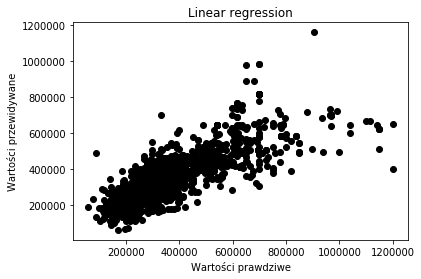

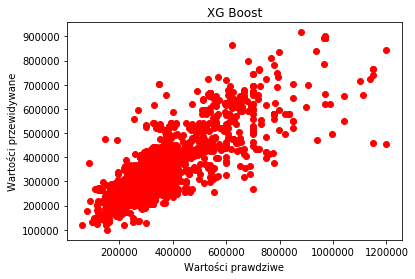

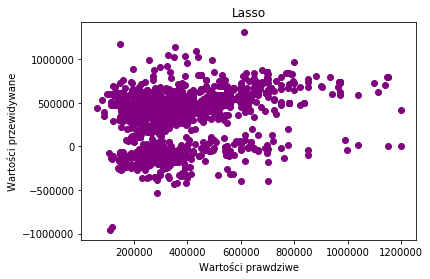

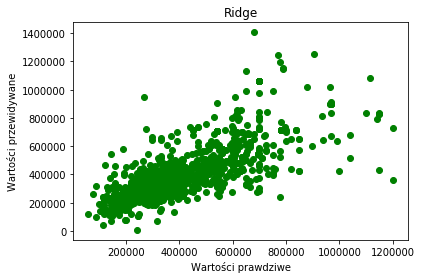

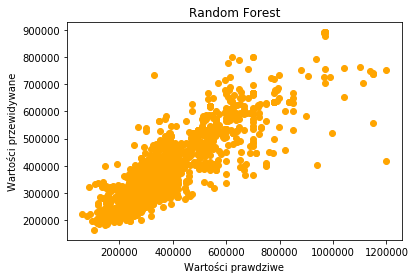

In [38]:
plt.scatter(y_wykr_df.cena,y_Linear_df[0], color='black')
plt.title('Linear regression')
plt.xlabel('Wartości prawdziwe')
plt.ylabel('Wartości przewidywane')
plt.show()

plt.scatter(y_wykr_df.cena,y_XGBoost_df[0], color='red')
plt.title('XG Boost')
plt.xlabel('Wartości prawdziwe')
plt.ylabel('Wartości przewidywane')
plt.show()

plt.scatter(y_wykr_df.cena,y_Lasso_df[0], color='purple')
plt.title('Lasso')
plt.xlabel('Wartości prawdziwe')
plt.ylabel('Wartości przewidywane')
plt.show()

plt.scatter(y_wykr_df.cena,y_Ridge_df[0], color='green')
plt.title('Ridge')
plt.xlabel('Wartości prawdziwe')
plt.ylabel('Wartości przewidywane')
plt.show()

plt.scatter(y_wykr_df.cena,y_Random_Forest_df[0], color='orange')
plt.title('Random Forest')
plt.xlabel('Wartości prawdziwe')
plt.ylabel('Wartości przewidywane')
plt.show()